In [4]:
import os

dataset_path = "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration"

# Function to count images in each folder recursively
def count_images_in_folders(path):
    folder_counts = {}
    total_train = 0
    total_test = 0
    
    for root, dirs, files in os.walk(path):
        image_count = sum(1 for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg')))
        relative_path = os.path.relpath(root, dataset_path)  # Get relative path from the dataset root
        
        if relative_path.startswith("Train"):
            total_train += image_count
        elif relative_path.startswith("Test"):
            total_test += image_count
        
        folder_counts[relative_path] = image_count
    
    return folder_counts, total_train, total_test

# Get image counts
image_counts, total_train, total_test = count_images_in_folders(dataset_path)

# Display only Train/ and Test/ subfolder names with counts
for folder, count in sorted(image_counts.items()):
    print(f"{folder}: {count} images")

# Display total image counts
print(f"\nTotal images in Train/: {total_train}")
print(f"Total images in Test/: {total_test}")
print(f"Grand Total images: {total_train + total_test}")

.: 0 images
Test: 0 images
Test/actinic keratosis: 16 images
Test/basal cell carcinoma: 16 images
Test/dermatofibroma: 16 images
Test/melanoma: 16 images
Test/nevus: 16 images
Test/pigmented benign keratosis: 16 images
Test/seborrheic keratosis: 3 images
Test/squamous cell carcinoma: 16 images
Test/vascular lesion: 3 images
Train: 0 images
Train/actinic keratosis: 114 images
Train/basal cell carcinoma: 376 images
Train/dermatofibroma: 95 images
Train/melanoma: 438 images
Train/nevus: 357 images
Train/pigmented benign keratosis: 462 images
Train/seborrheic keratosis: 77 images
Train/squamous cell carcinoma: 181 images
Train/vascular lesion: 139 images

Total images in Train/: 2239
Total images in Test/: 118
Grand Total images: 2357


# Augmentation

In [5]:
import os
import shutil
import random
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
input_path = "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration"
output_path = "/kaggle/working/augmented_dataset"

# Create output directory structure
if os.path.exists(output_path):
    shutil.rmtree(output_path)  # Remove if already exists
shutil.copytree(input_path, output_path)  # Copy dataset structure

# Augmentation settings
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

def augment_image(image_path):
    """ Load an image, apply augmentation, and return it as an array. """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    aug_iter = datagen.flow(image, batch_size=1)
    return next(aug_iter)[0].astype(np.uint8)  # Return the augmented image

def balance_images(folder_path, target_count):
    """ Adjust images in a folder to match the target count. """
    images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    current_count = len(images)

    # If too many images, randomly delete excess
    if current_count > target_count:
        images_to_remove = random.sample(images, current_count - target_count)
        for img in images_to_remove:
            os.remove(os.path.join(folder_path, img))

    # If too few images, augment until reaching target
    elif current_count < target_count:
        while len(os.listdir(folder_path)) < target_count:
            img_name = random.choice(images)  # Pick a random image
            img_path = os.path.join(folder_path, img_name)
            new_img = augment_image(img_path)  # Generate augmented image
            
            new_img_name = f"aug_{len(os.listdir(folder_path))}.jpg"
            cv2.imwrite(os.path.join(folder_path, new_img_name), cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR))

# Process Train/ and Test/ folders
for category in ["Train", "Test"]:
    category_path = os.path.join(output_path, category)
    
    for subfolder in os.listdir(category_path):
        subfolder_path = os.path.join(category_path, subfolder)
        
        if os.path.isdir(subfolder_path):
            if category == "Train":
                balance_images(subfolder_path, 400)  # Train: 400 images per category
            elif category == "Test":
                balance_images(subfolder_path, 30)   # Test: 30 images per category

print("Dataset augmentation completed. Final dataset saved at:", output_path)

Dataset augmentation completed. Final dataset saved at: /kaggle/working/augmented_dataset


In [6]:
import os

dataset_path = "/kaggle/working/augmented_dataset"

# Function to count images in each folder recursively
def count_images_in_folders(path):
    folder_counts = {}
    total_train = 0
    total_test = 0
    
    for root, dirs, files in os.walk(path):
        image_count = sum(1 for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg')))
        relative_path = os.path.relpath(root, dataset_path)  # Get relative path from the dataset root
        
        if relative_path.startswith("Train"):
            total_train += image_count
        elif relative_path.startswith("Test"):
            total_test += image_count
        
        folder_counts[relative_path] = image_count
    
    return folder_counts, total_train, total_test

# Get image counts
image_counts, total_train, total_test = count_images_in_folders(dataset_path)

# Display only Train/ and Test/ subfolder names with counts
for folder, count in sorted(image_counts.items()):
    print(f"{folder}: {count} images")

# Display total image counts
print(f"\nTotal images in Train/: {total_train}")
print(f"Total images in Test/: {total_test}")
print(f"Grand Total images: {total_train + total_test}")

.: 0 images
Test: 0 images
Test/actinic keratosis: 30 images
Test/basal cell carcinoma: 30 images
Test/dermatofibroma: 30 images
Test/melanoma: 30 images
Test/nevus: 30 images
Test/pigmented benign keratosis: 30 images
Test/seborrheic keratosis: 30 images
Test/squamous cell carcinoma: 30 images
Test/vascular lesion: 30 images
Train: 0 images
Train/actinic keratosis: 400 images
Train/basal cell carcinoma: 400 images
Train/dermatofibroma: 400 images
Train/melanoma: 400 images
Train/nevus: 400 images
Train/pigmented benign keratosis: 400 images
Train/seborrheic keratosis: 400 images
Train/squamous cell carcinoma: 400 images
Train/vascular lesion: 400 images

Total images in Train/: 3600
Total images in Test/: 270
Grand Total images: 3870


# CNN Model

Found 3600 images belonging to 9 classes.
Found 270 images belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 263ms/step - accuracy: 0.1373 - loss: 2.1848 - val_accuracy: 0.2000 - val_loss: 2.0421
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 235ms/step - accuracy: 0.2104 - loss: 1.9850 - val_accuracy: 0.2259 - val_loss: 1.9808
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 228ms/step - accuracy: 0.2565 - loss: 1.8578 - val_accuracy: 0.3185 - val_loss: 1.8810
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 234ms/step - accuracy: 0.3245 - loss: 1.7138 - val_accuracy: 0.3704 - val_loss: 1.8094
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 235ms/step - accuracy: 0.3666 - loss: 1.6459 - val_accuracy: 0.3593 - val_loss: 1.7588
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 235ms/step - accuracy: 0.4002 - loss: 1.5881 - val_accuracy: 0.4185 - val_loss: 1.7472
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 235ms/step - accuracy: 0.3814 - loss: 1.5776 - val_accuracy: 0.3704 - val_loss: 1.6769
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 238ms/step - accuracy: 0.4115 - loss: 1.5027 - val

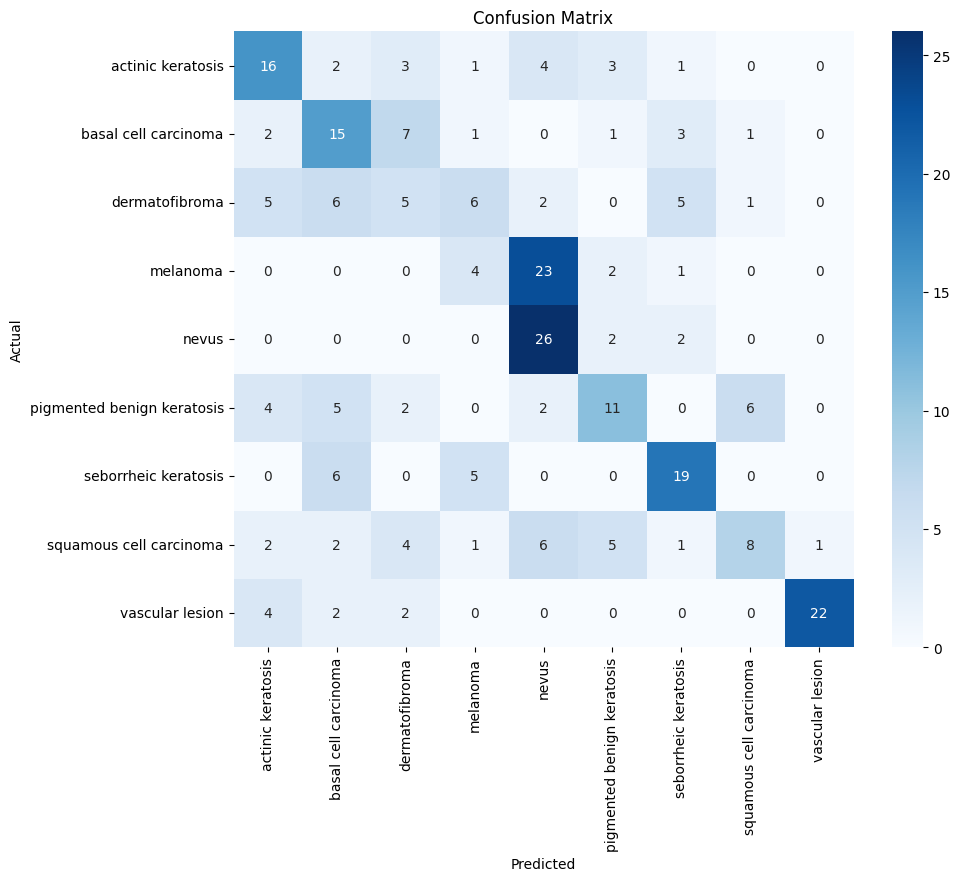

In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Define dataset paths
train_dir = "/kaggle/working/augmented_dataset/Train"
test_dir = "/kaggle/working/augmented_dataset/Test"

# Image parameters
img_size = (128, 128)  # Resize images
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Auto-detect number of classes

# Image data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)  
test_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=test_generator, epochs=20)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# EfficientNetB0

Found 3600 images belonging to 9 classes.
Found 270 images belonging to 9 classes.
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 144s 719ms/step - accuracy: 0.4175 - loss: 1.5695
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 466ms/step - accuracy: 0.7110 - loss: 0.7906
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 466ms/step - accuracy: 0.7440 - loss: 0.6705
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 468ms/step - accuracy: 0.7995 - loss: 0.5541
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 468ms/step - accuracy: 0.8356 - loss: 0.4643
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 57s 471ms/step - accuracy: 0.8419 - loss: 0.4372
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 57s 475ms/step - accuracy: 0.8398 - loss: 0.4037
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 57s 468ms/step - accuracy: 0.8595 - loss: 0.3808
Epoch 9/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 467ms/step - accuracy: 0.8671 - loss: 0.3603
Epoch 10/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 466ms/step - accuracy: 0.8791 - loss: 0.3225
Epoch 11/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 57s 470ms/step - accuracy: 0.8749 - loss: 0.3287
Epoch 12/15
113/113 ━━━━━━━━━

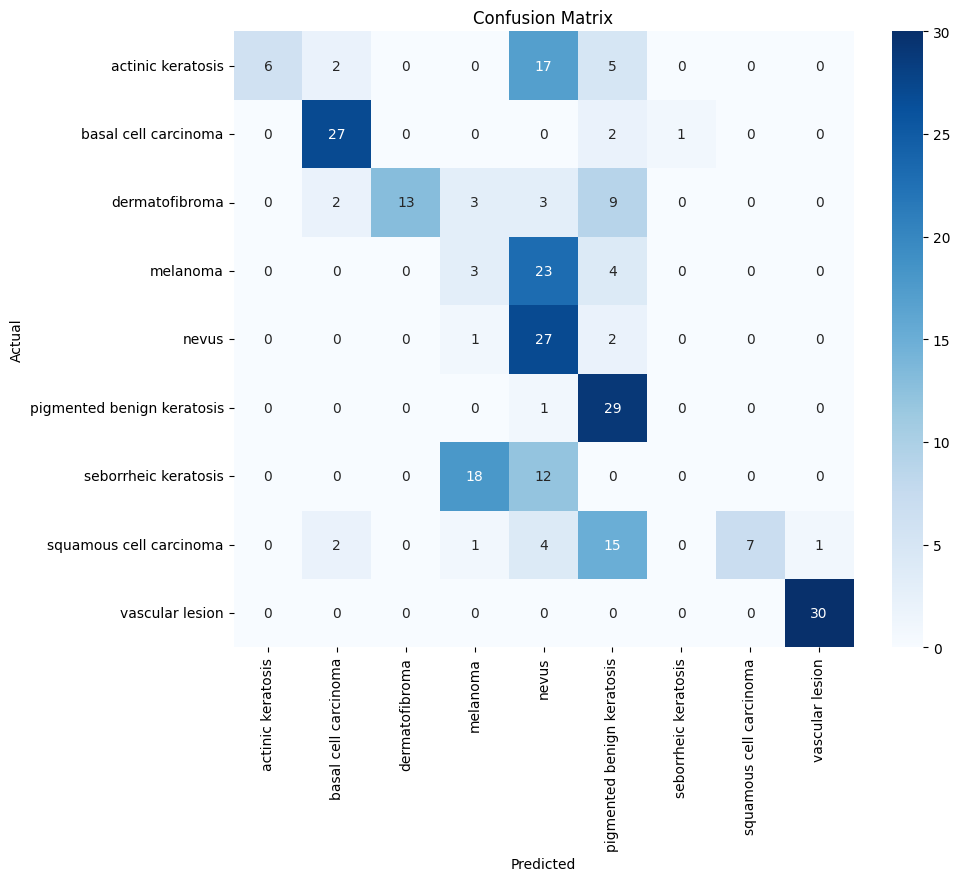

In [11]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from sklearn.metrics import classification_report, confusion_matrix

# Define dataset paths
train_dir = "/kaggle/working/augmented_dataset/Train"
test_dir = "/kaggle/working/augmented_dataset/Test"

# Image parameters
img_size = (224, 224)
batch_size = 32
num_classes = len(os.listdir(train_dir))  

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Load EfficientNetB0 as base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Unfreeze last 30 layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Build model
x = base_model.output
x = GlobalAveragePooling2D()(x)  
x = Dense(512, activation='swish')(x)  
x = Dropout(0.4)(x)  
x = Dense(256, activation='swish')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model without validation
model.fit(train_generator, epochs=15)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# EfficientNetB3

Found 3600 images belonging to 9 classes.
Found 270 images belonging to 9 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.3682 - loss: 1.7380 - learning_rate: 5.0000e-04
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 550ms/step - accuracy: 0.6143 - loss: 1.0830 - learning_rate: 5.0000e-04
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 65s 542ms/step - accuracy: 0.6949 - loss: 0.8940 - learning_rate: 5.0000e-04
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 548ms/step - accuracy: 0.7044 - loss: 0.8045 - learning_rate: 5.0000e-04
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 546ms/step - accuracy: 0.7601 - loss: 0.6526 - learning_rate: 5.0000e-04
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 550ms/step - accuracy: 0.7778 - loss: 0.6318 - learning_rate: 5.0000e-04
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 549ms/step - accuracy: 0.7908 - loss: 0.5839 - learning_rate: 5.0000e-04
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 547ms/step - accuracy: 0.8110 - loss: 0.5508 - learning_rate: 5.0000e-04
Epoch 9/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 548ms/step - accuracy: 0.8088 - l

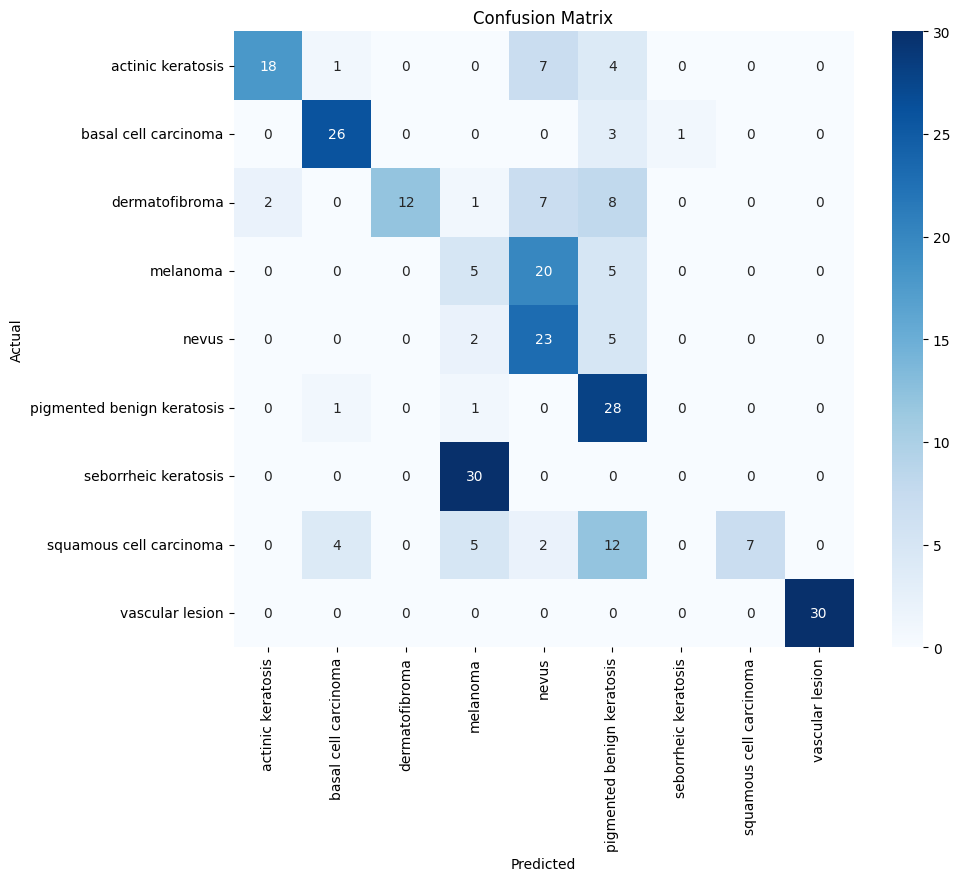

In [12]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# Dataset paths
train_dir = "/kaggle/working/augmented_dataset/Train"
test_dir = "/kaggle/working/augmented_dataset/Test"

# Image parameters
img_size = (224, 224)
batch_size = 32
num_classes = len(os.listdir(train_dir))  

# Improved Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]  
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Load EfficientNetB3 as base model
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tuning: Unfreeze last 40 layers
for layer in base_model.layers[-40:]:
    layer.trainable = True

# Build model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='swish')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='swish')(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Training with Early Stopping & LR Scheduling
model.fit(train_generator, epochs=30, callbacks=[EarlyStopping(monitor='accuracy', patience=7, restore_best_weights=True),
                                                 ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, min_lr=1e-6)])

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# CNN No Augmentation

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# Dataset paths
train_dir = "/kaggle/input/skin-cancer-img-augmented/skincancerimg/train"
test_dir = "/kaggle/input/skin-cancer-img-augmented/skincancerimg/test"

# Image parameters
img_size = (224, 224)
batch_size = 32
num_classes = len(os.listdir(train_dir))  

# Improved Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]  
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Load EfficientNetB3 as base model
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tuning: Unfreeze last 40 layers
for layer in base_model.layers[-40:]:
    layer.trainable = True

# Build model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='swish')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='swish')(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Training with Early Stopping & LR Scheduling
model.fit(train_generator, epochs=30, callbacks=[EarlyStopping(monitor='accuracy', patience=7, restore_best_weights=True),
                                                 ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, min_lr=1e-6)])

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Found 4500 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.3350 - loss: 1.8291 - learning_rate: 5.0000e-04
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 112s 752ms/step - accuracy: 0.5660 - loss: 1.2629 - learning_rate: 5.0000e-04
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 115s 764ms/step - accuracy: 0.6280 - loss: 1.0909 - learning_rate: 5.0000e-04
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 116s 779ms/step - accuracy: 0.6740 - loss: 0.9658 - learning_rate: 5.0000e-04
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 116s 779ms/step - accuracy: 0.6782 - loss: 0.9472 - learning_rate: 5.0000e-04
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 114s 765ms/step - accuracy: 0.7165 - loss: 0.8420 - learning_rate: 5.0000e-04
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 115s 770ms/step - accuracy: 0.7311 - loss: 0.7994 - learning_rate: 5.0000e-04
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 115s 770ms/step - accuracy: 0.7530 - loss: 0.7237 - learning_rate: 5.0000e-04
Epoch 9/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 112s 762ms/step - accuracy: 0.